# Random Shape in Blender

In [1]:
import math

In [ ]:
import bpy
import math
 
# mesh arrays
verts = []
faces = []
edges = []
 
#3D supershape parameters
m = 14.23
a = -0.06
b = 2.78
n1 = 0.5
n2 = -.48
n3 = 1.5
 
scale = 3
 
Unum = 50
Vnum = 50
 
Uinc = math.pi / (Unum/2)
Vinc = (math.pi/2)/(Vnum/2)
 
#fill verts array
theta = -math.pi
for i in range (0, Unum + 1):
    phi = -math.pi/2
    r1 = 1/(((abs(math.cos(m*theta/4)/a))**n2+(abs(math.sin(m*theta/4)/b))**n3)**n1)
    for j in range(0,Vnum + 1):
        r2 = 1/(((abs(math.cos(m*phi/4)/a))**n2+(abs(math.sin(m*phi/4)/b))**n3)**n1)
        x = scale * (r1 * math.cos(theta) * r2 * math.cos(phi))
        y = scale * (r1 * math.sin(theta) * r2 * math.cos(phi))
        z = scale * (r2 * math.sin(phi))
 
        vert = (x,y,z) 
        verts.append(vert)
        #increment phi
        phi = phi + Vinc
    #increment theta
    theta = theta + Uinc
 
#fill faces array
count = 0
for i in range (0, (Vnum + 1) *(Unum)):
    if count < Vnum:
        A = i
        B = i+1
        C = (i+(Vnum+1))+1
        D = (i+(Vnum+1))
 
        face = (A,B,C,D)
        faces.append(face)
 
        count = count + 1
    else:
        count = 0
 
#create mesh and object
mymesh = bpy.data.meshes.new("supershape")
myobject = bpy.data.objects.new("supershape",mymesh)
 
#set mesh location
myobject.location = bpy.context.scene.cursor.location
bpy.context.scene.collection.objects.link(myobject)
 
#create mesh from python data
mymesh.from_pydata(verts,edges,faces)
mymesh.update(calc_edges=True)
 
#set the object to edit mode
bpy.context.view_layer.objects.active = myobject
bpy.ops.object.mode_set(mode='EDIT')
 
# remove duplicate vertices
bpy.ops.mesh.remove_doubles()
 
## recalculate normals
#bpy.ops.mesh.normals_make_consistent(inside=False)
#bpy.ops.object.mode_set(mode='OBJECT')
# 
## subdivide modifier
#myobject.modifiers.new("subd", type='SUBSURF')
#myobject.modifiers['subd'].levels = 3
 
# show mesh as smooth
mypolys = mymesh.polygons
for p in mypolys:
    p.use_smooth = True

In [ ]:
len(verts)

In [ ]:
len(edges)

In [ ]:
len(faces)

# Generating 3D Points

### Random Colors

In [ ]:
import random
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
for i in range(5):
    [R,G,B,A]=[random.randint(0,255),random.randint(0,255),random.randint(0,255),random.randint(0,255)]
    img = Image.new('RGBA',(200,200),(R,G,B,A))
    print(f'({R},{B},{G},{A})')
    display(img)

### Random 3D points

In [ ]:
EDGES=[]

In [ ]:
points = np.mgrid[1:6, 2:5, 8:10]

In [ ]:
points.reshape(3, -1).T

In [ ]:
import random

num_vertices = 10

vertices = []
for i in range(num_vertices):
  x = random.uniform(-1, 1)
  y = random.uniform(-1, 1)
  z = random.uniform(-1, 1)
  vertices.append((x, y, z))

faces = set()
for i in range(num_vertices):
  for j in range(i + 1, num_vertices):
    if random.random() > 0.5:
      face = [i]
      print('Face1: ',face)
      for k in range(num_vertices):
        if (k != i) and (random.random() > 0.5):
          face.append(k)
          print('Face2: ',face)
      faces.add(tuple(face))
      print('Faces: ',faces)
      print('-'*100)

# Print the vertices and faces
# print("Vertices:", vertices)
# print("Faces:", list(faces))


In [ ]:
print(len(faces))
lengths=[len(a) for a in faces]
l_count=[]
for l in set(lengths):
    l_count.append([l,lengths.count(l)])
l_count

### Mutation

In [ ]:
import random

def mutate(numbers):
  # Choose a random index to mutate
  index = random.randint(0, len(numbers) - 1)
  
  # Choose a random new value for the mutated gene
  new_value = random.randint(min(numbers), max(numbers))
  
  # Perform the mutation
  numbers[index] = new_value
  
  return numbers


In [ ]:
numbers = [1, 2, 3, 4, 5]
mutated_numbers = mutate(numbers)

print(mutated_numbers)  # [1, 2, 3, 4, 5] (the original list may or may not be changed)


### Crossover

In [ ]:
import numpy as np

def crossover(arrays):
    """
    Performs crossover on the given array of arrays at a random crossover point
    and returns a new array of arrays as the result.
    """
    # Choose a random crossover point
    crossover_point = np.random.randint(0, len(arrays[0]))

    # Create a new array of arrays that is the same length as the input array
    new_arrays = []

    # Perform crossover on each array in the input array
    for array in arrays:
        # Create a new array that is the same length as the input array
        new_array = np.zeros(len(array))

        # Copy the first part of the input array to the new array
        new_array[:crossover_point] = array[:crossover_point]

        # Copy the second part of the next array in the input array to the new array
        new_array[crossover_point:] = arrays[(arrays.index(array)+1)%len(arrays)][crossover_point:]

        # Add the new array to the new array of arrays
        new_arrays.append(new_array)

    return new_arrays

# Example usage
arrays = [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15]]

crossover_result = crossover(arrays)
for array in crossover_result:
    print(array)


In [ ]:
import numpy as np

def crossover(array1, array2):
    """
    Performs crossover on the given arrays at a random crossover point and modifies
    the input arrays to contain the resulting children.
    """
    # Choose a random crossover point
    crossover_point = np.random.randint(0, len(array1))

    # Perform crossover on each element in the input arrays
    for i in range(len(array1)):
        # Check if the current element is an array
        if isinstance(array1[i], list):
            # Perform crossover on the inner arrays
            crossover(array1[i], array2[i])
        else:
            # Swap the current elements in the input arrays
            array1[i], array2[i] = array2[i], array1[i]

# Example usage
array1 = [[1, 2, 3], 4, [5, 6, 7]]
array2 = [[8, 9, 10], 11, [12, 13, 14]]

crossover(array1, array2)
print(array1)
print(array2)


## Access blender from python

In [2]:
import subprocess
import os

In [3]:
BLENDER_PATH="C:\\Program Files\\Blender Foundation\\Blender 3.3\\blender.exe"

In [5]:
os.system(f"blender --background --python test.py hello22")

1

In [41]:
subprocess.run([BLENDER_PATH, "--background", "--python","test.py","hello"],capture_output=True)

CompletedProcess(args=['C:\\Program Files\\Blender Foundation\\Blender 3.3\\blender.exe', '--background', '--python', 'test.py', 'hello'], returncode=1, stdout=b'Blender 3.3.1 (hash b292cfe5a936 built 2022-10-05 00:49:25)\nRead prefs: C:\\Users\\imvee\\AppData\\Roaming\\Blender Foundation\\Blender\\3.3\\config\\userpref.blend\nInfo: Removed 149 vertice(s)\nInfo: Total files 0 | Changed 0 | Failed 0\nInfo: Saved "pathToNewBlendFile.blend"\nError: Cannot read file \'E:\\Research\\Statue Generator\\hello\': No such file or directory\nInfo: Removed 149 vertice(s)\r\nInfo: Saved "pathToNewBlendFile.blend"\r\n\nBlender quit\n', stderr=b'')

In [8]:
subprocess.run([BLENDER_PATH, "--background", "--python","test.py","hello",x],capture_output=True)

CompletedProcess(args=['C:\\Program Files\\Blender Foundation\\Blender 3.3\\blender.exe', '--background', '--python', 'test.py', 'hello', '[[0.27660569493919507, 1.2944643490834338, 0.8507144187604503], [0.8833327836450764, 1.236172990369246, 1.4183486174746462], [0.2611927451334286, 1.464158797002439, 0.49715219881823525], [1.0892312205304295, 2.019587861886177, 1.050032280477898], [0.26773671990905745, 2.2509911542867793, 0.49325151439073966], [0.08936152109525808, 0.7743583770978557, 1.3972186456846432]]'], returncode=1, stdout=b'Blender 3.3.1 (hash b292cfe5a936 built 2022-10-05 00:49:25)\nRead prefs: C:\\Users\\imvee\\AppData\\Roaming\\Blender Foundation\\Blender\\3.3\\config\\userpref.blend\nInfo: Removed 149 vertice(s)\nInfo: Total files 0 | Changed 0 | Failed 0\nInfo: Saved "pathToNewBlendFile.blend"\nError: Cannot read file \'E:\\Research\\Statue Generator\\hello\': No such file or directory\nInfo: Removed 149 vertice(s)\r\nInfo: Saved "pathToNewBlendFile.blend"\r\n\nBlender qu

In [ ]:
import subprocess

# Run the subprocess and pass the long argument as the input
result = subprocess.run(['my_command'], input=long_argument, stdout=subprocess.PIPE, stderr=subprocess.PIPE, encoding='utf-8')

# Print the output and error
print(result.stdout)
print(result.stderr)


In [4]:
from CGen import *

In [5]:
x=generate_vertices(2,2,3,0.1)

In [6]:
x=str(x)
x

'[[0.27660569493919507, 1.2944643490834338, 0.8507144187604503], [0.8833327836450764, 1.236172990369246, 1.4183486174746462], [0.2611927451334286, 1.464158797002439, 0.49715219881823525], [1.0892312205304295, 2.019587861886177, 1.050032280477898], [0.26773671990905745, 2.2509911542867793, 0.49325151439073966], [0.08936152109525808, 0.7743583770978557, 1.3972186456846432]]'

In [15]:
from ast import literal_eval

In [10]:
literal_eval(x)

[[0.27660569493919507, 1.2944643490834338, 0.8507144187604503],
 [0.8833327836450764, 1.236172990369246, 1.4183486174746462],
 [0.2611927451334286, 1.464158797002439, 0.49715219881823525],
 [1.0892312205304295, 2.019587861886177, 1.050032280477898],
 [0.26773671990905745, 2.2509911542867793, 0.49325151439073966],
 [0.08936152109525808, 0.7743583770978557, 1.3972186456846432]]

In [26]:
y='[1,2,3,2]'
y=literal_eval(y)
y

[1, 2, 3, 2]

In [27]:
import numpy as np
np.argmax(y)

2

### RGBA to hex

In [1]:
# The RGBA color (0, 255, 0, 0.5)
r=0
g=255
b=0
a=254


# Convert the RGBA color to a hexadecimal color value
hex_color = "#{:02x}{:02x}{:02x}{:02x}".format(r,g,b,a)

# Print the hexadecimal color value
print(hex_color)


#00ff00fe


In [34]:
hex_color = "#ff000080"
mat = bpy.data.materials.new("MyMaterial")
mat.diffuse_color = hex_color

myobject.data.materials.append(mat)

NameError: name 'bpy' is not defined

In [33]:
import datetime
print(str(datetime.datetime.now().isoformat())+"_hi")

2022-12-16T01:56:04.097481_hi


## fitness

In [47]:
import zlib,sys
import os
# filename_in = "data"
# filename_out = "compressed_data"

compressed=[]

for file in os.listdir("E:\Research\Statue Generator\Generations\GEN_0"):
    
    if file.endswith('.blend'):
    
        with open("E:\Research\Statue Generator\Generations\GEN_0\\"+file, mode="rb") as fin, open(file[:-3]+"_compressed", mode="wb") as fout:
            data = fin.read()
            compressed_data = zlib.compress(data, zlib.Z_BEST_COMPRESSION)
            orig=sys.getsizeof(data)
            comp=sys.getsizeof(compressed_data)
            compressed.append(comp/orig)

In [48]:
compressed

[0.11783961919605614,
 0.1181038299823986,
 0.11805995375031271,
 0.11786247830266695,
 0.1180737152305355,
 0.11798615087994783,
 0.1179179780673953,
 0.11791429189020197,
 0.11802568036115067,
 0.11807770996072901]

In [20]:
import numpy as np

In [21]:
np.argmax(compressed)

5

In [25]:
compressed

[0.11801559949653839,
 0.11789659085218314,
 0.11801374151835356,
 0.11801234653804978,
 0.11805059660044555,
 0.11809032043953523,
 0.11787144694557328,
 0.11789739586959681,
 0.11808642118401194]

In [22]:
compressed[5]

0.11809032043953523

In [18]:
array = ['item1', 'item2', 'item3']

with open('array.txt', 'w') as f:
    f.writelines(str(array))


In [19]:
with open('array.txt', 'r') as f:
    array = f.readlines()

# Strip the newline characters from the end of each string
array = literal_eval(array[0])

print(array)


['item1', 'item2', 'item3']


In [2]:
from ast import literal_eval

In [3]:
with open("E:\Research\Statue Generator\Generations\GEN_0\FACES_G0_S0.txt", 'r') as f:
    array = f.readlines()

# Strip the newline characters from the end of each string
array = literal_eval(array[0])

print(array)


[(2, 0, 1, 4, 5, 6), (5, 3, 6), (0, 1, 2, 4, 6), (0, 3, 4, 6), (0, 1, 2, 4), (2, 0, 1, 5, 6), (1, 0, 3, 4), (1, 4, 5), (1, 0, 4, 6)]


In [4]:
x=[2,3,3,5,56,2,234,2,1]

In [6]:
import numpy as np

In [27]:
%%time
np.argmax(x)

Wall time: 0 ns


6

In [42]:
%%time
x.index(max(x))

Wall time: 0 ns


6

## Fractal Dimension

In [1]:
faces=[(0, 1), (0, 3), (0, 1, 2, 4), (1, 3, 4), (1, 2, 3, 4), (0,), (2, 0, 3)]

In [2]:
len_faces=[len(f) for f in faces]
len_faces

[2, 2, 4, 3, 4, 1, 3]

In [9]:
def CountFrequency(my_list):
    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    
    return freq

In [15]:
x=CountFrequency(len_faces)

In [11]:
def countFrequency(my_list):
    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    
    return freq

In [26]:
def fractal_dimension(FACES):

    len_faces=[len(f) for f in faces]
    unique_count=CountFrequency(len_faces)
    print(unique_count)
    res=0
    for key in unique_count:
        res+=(1/unique_count[key])
    
    return round(res,6)

In [27]:
fractal_dimension(faces)

{2: 2, 4: 2, 3: 2, 1: 1}


2.5

## generate edges

In [2]:
import random

num_vertices = 10

vertices = []
for i in range(num_vertices):
  x = random.uniform(-1, 1)
  y = random.uniform(-1, 1)
  z = random.uniform(-1, 1)
  vertices.append((x, y, z))

vertices

[(0.7977293920228825, 0.3737867647927611, -0.32096963879804763),
 (-0.9383543952470319, -0.31837585474495556, 0.04080789843810928),
 (0.6405528361393618, -0.25960344334771857, -0.06688335586746574),
 (0.764296043596792, 0.4895165402607795, -0.6340661399733201),
 (0.9582067087642454, 0.8368761555178874, -0.6686447295080875),
 (-0.8149763599547326, -0.24486615836612824, -0.14869107128010972),
 (0.47609316419465175, -0.30779098469689825, -0.02201530438927679),
 (-0.5929319180546648, -0.615099268460549, -0.05855663495631913),
 (-0.8512944713265986, -0.7537875287324851, 0.523181594608219),
 (-0.7132534426997019, 0.43776365932798944, -0.8691923272753816)]

In [17]:
def generate_edges(numOfVertices):
    EDGES=[]
    for i in range(numOfVertices-1):
        for j in range(numOfVertices-1):
            if i!=j:
                if random.random()>0.5:
                    if (i,j) not in EDGES and (j,i) not in EDGES:
                        EDGES.append((i,j))
    
    return EDGES

In [18]:
generate_edges(len(vertices))

[(0, 1),
 (0, 2),
 (0, 5),
 (0, 7),
 (1, 2),
 (1, 3),
 (1, 6),
 (1, 8),
 (2, 5),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (4, 0),
 (4, 6),
 (5, 1),
 (5, 7),
 (7, 1),
 (7, 2),
 (7, 4),
 (7, 6),
 (7, 8),
 (8, 3),
 (8, 4),
 (8, 6)]

In [1]:
import random

In [23]:
def generate_edges(numOfVertices):
    EDGES=[]

    for i in range(numOfVertices-1):
        
        j=random.choice(list(range(numOfVertices-1)))
        
        if (
            i != j
            and random.random() > 0.5
            and (i, j) not in EDGES
            and (j, i) not in EDGES
        ):
            EDGES.append((i, j))

    if EDGES:
        return EDGES
    else:
        return generate_edges(numOfVertices)

In [24]:
list(range(7))

[0, 1, 2, 3, 4, 5, 6]

In [35]:
generate_edges(10)

[(0, 4)]

In [ ]:
def generate_edges(numOfVertices):
    EDGES=[]

    for i in range(numOfVertices-1):
        for j in range(numOfVertices-1):
            if (
                i != j
                and random.random() > 0.5
                and (i, j) not in EDGES
                and (j, i) not in EDGES
            ):
                EDGES.append((i, j))

    if EDGES:
        return EDGES
    else:
        return generate_edges(numOfVertices)

In [2]:
import random
import os
import sys
from CGen import *
from EA_MC import *

In [3]:
L,B,H=10,10,20
POPULATION_SIZE=10
PARAMS=[]

In [3]:
%%time

INITIAL_POPULATION=[]

for _ in range(POPULATION_SIZE):
    CH=generate_chromosome(L,B,H)
    INITIAL_POPULATION.append(CH)
    get_stats(CH)
    print('-'*125)

PARAMS.append(INITIAL_POPULATION)

(R,G,B,A) = (97,208,196,61)
Roughness Factor = 5
Number of vertices = 9
Number of faces = 19
New Bounding Box - (L,B,H) = (1.245218,7.687221,17.887529)
-----------------------------------------------------------------------------------------------------------------------------
(R,G,B,A) = (32,252,185,48)
Roughness Factor = 2
Number of vertices = 29
Number of faces = 214
New Bounding Box - (L,B,H) = (9.99873,8.799917,9.675369)
-----------------------------------------------------------------------------------------------------------------------------
(R,G,B,A) = (111,36,134,158)
Roughness Factor = 0
Number of vertices = 4
Number of faces = 2
New Bounding Box - (L,B,H) = (7.177611,6.89814,14.351518)
-----------------------------------------------------------------------------------------------------------------------------
(R,G,B,A) = (129,235,177,115)
Roughness Factor = 0
Number of vertices = 4
Number of faces = 2
New Bounding Box - (L,B,H) = (5.395484,7.255196,3.197496)
---------------

In [38]:
i=4

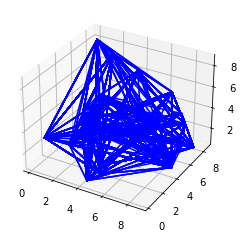

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the vertices
vertices = PARAMS[0][i][5][0]

# Define the faces
faces = PARAMS[0][i][5][1]

# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Loop through the faces and plot each one
for face in faces:
    xs = [vertices[vertex][0] for vertex in face]
    ys = [vertices[vertex][1] for vertex in face]
    zs = [vertices[vertex][2] for vertex in face]
    ax.plot(xs, ys, zs, 'b')

# Show the plot
plt.axis()
plt.show()


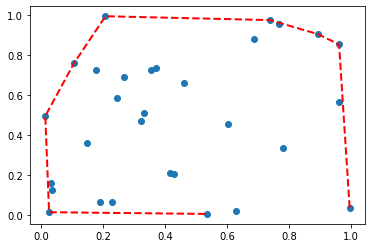

In [67]:
from scipy.spatial import ConvexHull,Delaunay,Voronoi
import numpy as np

points = np.random.rand(30, 2)  # generate 30 random points in 2D
hull = ConvexHull(points)

# hull.vertices gives the indices of the points in the convex hull
# hull.points[hull.vertices,:] gives the coordinates of the convex hull points
import matplotlib.pyplot as plt

plt.plot(points[:,0], points[:,1], 'o')
plt.plot(hull.points[hull.vertices,0], hull.points[hull.vertices,1], 'r--', lw=2)
plt.show()


# Delaunay

In [81]:
import random
import scipy.spatial

# Generate a random number of vertices
num_vertices = random.randint(100,120)

# Create a new mesh
#mesh = bpy.data.meshes.new("Random Mesh")

# Create a list of random vertices
vertices = [(random.uniform(-1, 1), random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(num_vertices)]
vertices=list(set(vertices))

# Use a Delaunay triangulation to generate the faces
tri = scipy.spatial.Delaunay(vertices)
print(tri.simplices)

# Create a list of faces from the Delaunay triangles
# faces = []
# for i in range(tri.simplices.shape[0]):
#     for j in range(3):
#         face = (tri.simplices[i, j], tri.simplices[i, (j+1)%3], tri.simplices[i, (j+2)%3])
#         if face not in faces: 
#             faces.append(face)
    
               
faces = [(tri.simplices[i, j], tri.simplices[i, (j+1)%3], tri.simplices[i, (j+2)%3]) for i in range(tri.simplices.shape[0]) for j in range(3)]
# faces=list(set(faces))
# Create the mesh from the vertices and faces
#mesh.from_pydata(vertices, [], faces)

# Update the mesh to reflect the changes
#mesh.update()

# # reate an object from the mesh and add it to the scene
# obj = bpy.data.objects.new("Random Mesh", mesh)
# bpy.context.collection.objects.link(obj)

# # Select the object and make it active
# bpy.context.view_layer.objects.active = obj
# obj.select_set(True)


[[ 90 103 118   4]
 [ 90 103  15   4]
 [ 21  97  56 106]
 ...
 [113  12  34 112]
 [113  12  60 107]
 [113  12  25  60]]


In [82]:
print(vertices)

[(0.838609624401419, 0.7327823767593846, 0.08596815220688936), (-0.1342379994177041, -0.08607886049604829, -0.15161986794244675), (0.6651005165618946, -0.32507492440901076, -0.10652225564524476), (0.4727740788611339, -0.5998907905232405, 0.14110695289410513), (-0.8207563859219846, 0.9753687134649334, 0.980394578142548), (0.5923469628703517, 0.17962342644765994, 0.7585367497079685), (-0.4792818757466468, 0.29336863618916387, -0.39407314307568897), (0.18730576688897638, -0.7008531735459076, -0.6660207533877733), (0.7464359099796816, 0.4475190212396787, -0.2082288046669205), (0.5872351319832896, -0.7975489896600922, -0.9529297491554747), (-0.6741811683215548, -0.2245047231899231, 0.5082830153402558), (0.3229061976715695, 0.3805084565165895, 0.9399782282841602), (0.24845259402441733, 0.14987225574514706, 0.13530792059292107), (0.2616726474958817, -0.14761124418607796, 0.9636054573026203), (-0.19779535858173025, 0.6420212999182651, -0.42269262872942837), (-0.666266790519427, 0.5997601891337

In [84]:
print(faces)

[(90, 103, 118), (103, 118, 90), (118, 90, 103), (90, 103, 15), (103, 15, 90), (15, 90, 103), (21, 97, 56), (97, 56, 21), (56, 21, 97), (21, 83, 56), (83, 56, 21), (56, 21, 83), (21, 83, 97), (83, 97, 21), (97, 21, 83), (21, 66, 97), (66, 97, 21), (97, 21, 66), (21, 66, 98), (66, 98, 21), (98, 21, 66), (33, 21, 97), (21, 97, 33), (97, 33, 21), (65, 98, 10), (98, 10, 65), (10, 65, 98), (65, 66, 98), (66, 98, 65), (98, 65, 66), (65, 30, 10), (30, 10, 65), (10, 65, 30), (65, 10, 118), (10, 118, 65), (118, 65, 10), (65, 66, 118), (66, 118, 65), (118, 65, 66), (17, 33, 97), (33, 97, 17), (97, 17, 33), (17, 33, 83), (33, 83, 17), (83, 17, 33), (7, 117, 56), (117, 56, 7), (56, 7, 117), (7, 9, 117), (9, 117, 7), (117, 7, 9), (24, 117, 66), (117, 66, 24), (66, 24, 117), (24, 21, 97), (21, 97, 24), (97, 24, 21), (24, 21, 66), (21, 66, 24), (66, 24, 21), (24, 97, 56), (97, 56, 24), (56, 24, 97), (24, 117, 56), (117, 56, 24), (56, 24, 117), (24, 117, 97), (117, 97, 24), (97, 24, 117), (24, 66, 37)

# Convex Hull

In [102]:
import random
import scipy.spatial

# Generate a random number of vertices
num_vertices = random.randint(100,120)

# Create a new mesh
#mesh = bpy.data.meshes.new("Random Mesh")

# Create a list of random vertices
vertices = [(round(random.uniform(-1, 1),6),round(random.uniform(-1, 1),6),round(random.uniform(-1, 1),6)) for i in range(num_vertices)]
vertices=list(set(vertices))

# Use a Delaunay triangulation to generate the faces
tri = scipy.spatial.ConvexHull(vertices)
print(tri.simplices)

# Create a list of faces from the Delaunay triangles
# faces = []
# for i in range(tri.simplices.shape[0]):
#     for j in range(3):
#         face = (tri.simplices[i, j], tri.simplices[i, (j+1)%3], tri.simplices[i, (j+2)%3])
#         if face not in faces: 
#             faces.append(face)
    
               
faces = [(tri.simplices[i, j], tri.simplices[i, (j+1)%3], tri.simplices[i, (j+2)%3]) for i in range(tri.simplices.shape[0]) for j in range(3)]
unique_faces = []

for f in faces:
    # Sort the tuple so that we can compare it to other tuples
    # regardless of the order of the values
    sorted_face = tuple(sorted(f))

    if sorted_face not in unique_faces:
        unique_faces.append(sorted_face)
        

# faces=list(set(faces))
# Create the mesh from the vertices and faces
#mesh.from_pydata(vertices, [], faces)

# Update the mesh to reflect the changes
#mesh.update()

# # reate an object from the mesh and add it to the scene
# obj = bpy.data.objects.new("Random Mesh", mesh)
# bpy.context.collection.objects.link(obj)

# # Select the object and make it active
# bpy.context.view_layer.objects.active = obj
# obj.select_set(True)


[[ 2 83 99]
 [23 32 99]
 [23 83 99]
 [53 30  9]
 [53 28 30]
 [53  8  9]
 [53 28 20]
 [85 24 30]
 [ 7 24 30]
 [ 7 24 67]
 [ 7 30 32]
 [ 7 67 32]
 [50 83 20]
 [50 23 83]
 [50 28 20]
 [50 23 28]
 [76 28 30]
 [76 23 28]
 [76 30 32]
 [76 23 32]
 [40  8  9]
 [40 98  8]
 [40 98 85]
 [80 53 20]
 [80 95 53]
 [80 83 20]
 [80  2 83]
 [58 53  8]
 [61 98 85]
 [61 36 11]
 [61 98  8]
 [61 67 11]
 [61 67 32]
 [61 32 99]
 [90 40  9]
 [90 40 85]
 [90 30  9]
 [90 85 30]
 [64 67 11]
 [64 24 67]
 [ 1 85 24]
 [ 1 64 24]
 [ 1 36 11]
 [ 1 64 11]
 [73 63  2]
 [73  2 99]
 [73 61 99]
 [73 63  8]
 [73 61  8]
 [86 63  2]
 [86 80  2]
 [86 80 95]
 [86 95 53]
 [86 58 53]
 [60 61 85]
 [60 61 36]
 [60  1 85]
 [60  1 36]
 [57 63  8]
 [57 86 63]
 [57 58  8]
 [57 86 58]]


In [103]:
print(faces)

[(2, 83, 99), (83, 99, 2), (99, 2, 83), (23, 32, 99), (32, 99, 23), (99, 23, 32), (23, 83, 99), (83, 99, 23), (99, 23, 83), (53, 30, 9), (30, 9, 53), (9, 53, 30), (53, 28, 30), (28, 30, 53), (30, 53, 28), (53, 8, 9), (8, 9, 53), (9, 53, 8), (53, 28, 20), (28, 20, 53), (20, 53, 28), (85, 24, 30), (24, 30, 85), (30, 85, 24), (7, 24, 30), (24, 30, 7), (30, 7, 24), (7, 24, 67), (24, 67, 7), (67, 7, 24), (7, 30, 32), (30, 32, 7), (32, 7, 30), (7, 67, 32), (67, 32, 7), (32, 7, 67), (50, 83, 20), (83, 20, 50), (20, 50, 83), (50, 23, 83), (23, 83, 50), (83, 50, 23), (50, 28, 20), (28, 20, 50), (20, 50, 28), (50, 23, 28), (23, 28, 50), (28, 50, 23), (76, 28, 30), (28, 30, 76), (30, 76, 28), (76, 23, 28), (23, 28, 76), (28, 76, 23), (76, 30, 32), (30, 32, 76), (32, 76, 30), (76, 23, 32), (23, 32, 76), (32, 76, 23), (40, 8, 9), (8, 9, 40), (9, 40, 8), (40, 98, 8), (98, 8, 40), (8, 40, 98), (40, 98, 85), (98, 85, 40), (85, 40, 98), (80, 53, 20), (53, 20, 80), (20, 80, 53), (80, 95, 53), (95, 53, 8

In [104]:
print(vertices)

[(-0.451503, -0.367717, 0.521584), (0.083794, -0.574586, 0.908944), (-0.763612, -0.425161, -0.853582), (0.355552, 0.168243, 0.027095), (0.434753, -0.541252, -0.266503), (0.729901, 0.460623, 0.045474), (-0.774564, -0.756578, -0.025203), (0.393072, 0.811142, 0.815196), (0.411656, -0.981079, -0.696628), (0.998725, -0.339679, -0.519566), (0.012949, -0.618723, -0.436866), (-0.653458, -0.411039, 0.996352), (0.58084, 0.679854, -0.126302), (-0.919344, -0.90629, 0.646057), (-0.715202, -0.205282, 0.392244), (0.824111, 0.638335, 0.617597), (-0.177137, 0.491923, -0.246887), (0.420878, -0.398108, 0.50145), (-0.166906, 0.081621, -0.132326), (0.430712, 0.551789, 0.076946), (-0.419209, 0.529611, -0.94728), (0.763681, 0.342995, 0.614073), (-0.378404, -0.292237, 0.049244), (-0.810733, 0.982238, -0.011438), (0.475747, 0.443781, 0.97374), (0.455779, 0.072115, -0.158321), (0.26291, 0.234722, 0.786867), (0.270498, -0.544432, 0.321485), (0.47671, 0.856417, -0.833054), (0.208335, 0.50026, 0.422643), (0.961341

In [105]:
print(unique_faces)

[(2, 83, 99), (23, 32, 99), (23, 83, 99), (9, 30, 53), (28, 30, 53), (8, 9, 53), (20, 28, 53), (24, 30, 85), (7, 24, 30), (7, 24, 67), (7, 30, 32), (7, 32, 67), (20, 50, 83), (23, 50, 83), (20, 28, 50), (23, 28, 50), (28, 30, 76), (23, 28, 76), (30, 32, 76), (23, 32, 76), (8, 9, 40), (8, 40, 98), (40, 85, 98), (20, 53, 80), (53, 80, 95), (20, 80, 83), (2, 80, 83), (8, 53, 58), (61, 85, 98), (11, 36, 61), (8, 61, 98), (11, 61, 67), (32, 61, 67), (32, 61, 99), (9, 40, 90), (40, 85, 90), (9, 30, 90), (30, 85, 90), (11, 64, 67), (24, 64, 67), (1, 24, 85), (1, 24, 64), (1, 11, 36), (1, 11, 64), (2, 63, 73), (2, 73, 99), (61, 73, 99), (8, 63, 73), (8, 61, 73), (2, 63, 86), (2, 80, 86), (80, 86, 95), (53, 86, 95), (53, 58, 86), (60, 61, 85), (36, 60, 61), (1, 60, 85), (1, 36, 60), (8, 57, 63), (57, 63, 86), (8, 57, 58), (57, 58, 86)]


In [106]:
len(unique_faces)

62

In [107]:
len(vertices)

101

In [108]:
len(faces)

186

# Convex hull

In [109]:
#import bpy
import random
from scipy.spatial import ConvexHull

# Create an empty mesh and object
# mesh = bpy.data.meshes.new("Convex Hull")
# obj = bpy.data.objects.new("Convex Hull", mesh)

# # Add the object to the scene
# bpy.context.collection.objects.link(obj)

# Create a list of random vertices
vertices = [(random.uniform(-1, 1), random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(10)]

# Create a convex hull object from the vertices
hull = ConvexHull(vertices)

# Get the vertices and faces of the convex hull
hull_vertices = hull.points[hull.vertices]
hull_faces = [[vi for vi in face] for face in hull.simplices]

# # Create the mesh from the vertices and faces
# mesh.from_pydata(hull_vertices, [], hull_faces)

# # Update the mesh with the new data
# mesh.update()


In [110]:
print(vertices)

[(0.25939024609868055, -0.802373311601831, -0.34732776659654063), (0.5838053336268287, -0.9298713638897114, -0.5512035039182717), (0.8114965573452919, 0.8665808759093534, 0.18093831878944577), (-0.7728344645230425, 0.8672480447027222, 0.7390647111001587), (0.6321494484139905, 0.8337273500810569, 0.6122629897309968), (0.3556040307538937, -0.8149392146640775, -0.3308089831413106), (0.7592558162064973, 0.7134076942197065, 0.39476929309659425), (-0.6246130541175812, 0.20717666510218868, -0.9015146667230256), (-0.760209937866446, -0.8633709899303046, -0.0603140402918787), (-0.7106332108119207, 0.3762620346727743, 0.3320751490032554)]


In [113]:
print(hull_faces)

[[7, 2, 3], [7, 1, 2], [8, 7, 3], [8, 7, 1], [4, 2, 3], [4, 8, 3], [6, 1, 2], [6, 4, 2], [6, 4, 1], [5, 8, 1], [5, 4, 1], [5, 4, 8]]


In [152]:
#import bpy
import random
from scipy.spatial import ConvexHull,Delaunay

# # Create an empty mesh and object
# mesh = bpy.data.meshes.new("Convex Hull")
# obj = bpy.data.objects.new("Convex Hull", mesh)

# # Add the object to the scene
# bpy.context.collection.objects.link(obj)

# Create a list of random vertices
vertices = [(random.uniform(-1, 1), random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(10)]

# Create a convex hull object from the vertices
hull = Delaunay(vertices)

# Get the vertices and faces of the convex hull
hull_vertices = hull.points[hull.vertices]
hull_faces = hull.simplices

# Convert the faces to quads by adding the 3rd vertex of each face as the 4th vertex of the quad
quads = []
for face in hull_faces:
    quads.append([face[0], face[1], face[2], face[2]])

# # Create the mesh from the vertices and faces
# mesh.from_pydata(hull_vertices, [], quads)

# # Update the mesh with the new data
# mesh.update()


In [153]:
print(len(vertices))

10


In [159]:
vertices

[(0.35725517347507196, 0.8190408349470504, 0.8122612018576632),
 (-0.13219278929110034, 0.7381035426938352, 0.24376977654088217),
 (0.5841062808268616, 0.14737231520602, -0.8197069125322463),
 (-0.7897701286942154, 0.4262335477060666, 0.6877619390698735),
 (-0.5778030277561041, -0.8704717355172531, -0.8968412072831566),
 (-0.11426813398492963, 0.3787250908777433, -0.510253314496472),
 (-0.50865712764647, 0.43843688293742966, 0.9383234184038172),
 (0.8657909534450039, 0.2673271329456308, -0.32309003799426717),
 (-0.5154846616509976, -0.2750017619273062, -0.01595686841931121),
 (-0.9343691832265939, -0.5645827474619911, -0.9843507601680881)]

In [157]:
len(hull_vertices)

14

In [158]:
hull_faces

array([[5, 8, 4, 9],
       [1, 5, 8, 7],
       [0, 1, 8, 7],
       [0, 1, 8, 6],
       [2, 5, 4, 9],
       [2, 8, 4, 7],
       [2, 5, 8, 7],
       [2, 5, 8, 4],
       [2, 1, 5, 7],
       [3, 5, 8, 9],
       [3, 1, 5, 8],
       [3, 1, 8, 6],
       [3, 8, 4, 9],
       [3, 0, 1, 6]], dtype=int32)

In [156]:
print(quads)

[[5, 8, 4, 4], [1, 5, 8, 8], [0, 1, 8, 8], [0, 1, 8, 8], [2, 5, 4, 4], [2, 8, 4, 4], [2, 5, 8, 8], [2, 5, 8, 8], [2, 1, 5, 5], [3, 5, 8, 8], [3, 1, 5, 5], [3, 1, 8, 8], [3, 8, 4, 4], [3, 0, 1, 1]]


In [12]:
#import bpy
import random

# Number of vertices in the statue
num_vertices = 50

# Minimum and maximum coordinates for the vertices
min_coord = -1
max_coord = 1

# Create a new mesh and object
# mesh = bpy.data.meshes.new("Statue")
# object = bpy.data.objects.new("Statue", mesh)

# # Set the location and scene of the object
# object.location = (0,0,0)
# bpy.context.collection.objects.link(object)

# Create a list of vertices
vertices = []

# Generate random vertices
for i in range(num_vertices):
    x = random.uniform(min_coord, max_coord)
    y = random.uniform(min_coord, max_coord)
    z = random.uniform(min_coord, max_coord)
    vertices.append((x, y, z))

# Create a list of faces
faces = []

# Generate faces that connect each vertex to all of the vertices that follow it
for i in range(num_vertices):
    for j in range(i+1, num_vertices):
        v1 = i
        v2 = j
        v3 = (j+1) % num_vertices
        faces.append((v1, v2, v3))

# # Add the vertices and faces to the mesh
# mesh.from_pydata(vertices, [], faces)

# # Update the mesh
# mesh.update()

In [13]:
vertices

[(-0.33653758803158196, 0.11234823471888933, 0.1587863543761625),
 (-0.41246444673899507, 0.829423644855523, -0.03611620490460443),
 (0.4577437779749016, 0.24723789774998584, 0.5816419811739768),
 (0.22492763722848785, -0.6227365526668089, -0.16290394193732194),
 (0.48019326332481294, -0.12060761268882247, 0.6841367451152309),
 (-0.038690929542348096, -0.22512623740941295, 0.9852946466475299),
 (0.11918454351205487, 0.8654213880805173, -0.6963338165289543),
 (-0.4135261419303178, 0.0460980431141369, -0.008805394057404214),
 (-0.4401049277967808, -0.65355805131732, -0.49178888024121226),
 (-0.8690789064710447, -0.2772466102774598, 0.8149036900030135),
 (0.9808584403332903, 0.030054505397712372, 0.5317871626013124),
 (-0.5758128919350056, -0.8395664768267395, -0.09312810822424811),
 (-0.24641570992545558, -0.17053510947637274, -0.13417774761592716),
 (0.4615793826399164, -0.35342959901243964, -0.5492510365715684),
 (-0.6468255780652217, -0.28420248803685966, -0.49641640965662615),
 (0.21

In [14]:
faces

[(0, 1, 2),
 (0, 2, 3),
 (0, 3, 4),
 (0, 4, 5),
 (0, 5, 6),
 (0, 6, 7),
 (0, 7, 8),
 (0, 8, 9),
 (0, 9, 10),
 (0, 10, 11),
 (0, 11, 12),
 (0, 12, 13),
 (0, 13, 14),
 (0, 14, 15),
 (0, 15, 16),
 (0, 16, 17),
 (0, 17, 18),
 (0, 18, 19),
 (0, 19, 20),
 (0, 20, 21),
 (0, 21, 22),
 (0, 22, 23),
 (0, 23, 24),
 (0, 24, 25),
 (0, 25, 26),
 (0, 26, 27),
 (0, 27, 28),
 (0, 28, 29),
 (0, 29, 30),
 (0, 30, 31),
 (0, 31, 32),
 (0, 32, 33),
 (0, 33, 34),
 (0, 34, 35),
 (0, 35, 36),
 (0, 36, 37),
 (0, 37, 38),
 (0, 38, 39),
 (0, 39, 40),
 (0, 40, 41),
 (0, 41, 42),
 (0, 42, 43),
 (0, 43, 44),
 (0, 44, 45),
 (0, 45, 46),
 (0, 46, 47),
 (0, 47, 48),
 (0, 48, 49),
 (0, 49, 0),
 (1, 2, 3),
 (1, 3, 4),
 (1, 4, 5),
 (1, 5, 6),
 (1, 6, 7),
 (1, 7, 8),
 (1, 8, 9),
 (1, 9, 10),
 (1, 10, 11),
 (1, 11, 12),
 (1, 12, 13),
 (1, 13, 14),
 (1, 14, 15),
 (1, 15, 16),
 (1, 16, 17),
 (1, 17, 18),
 (1, 18, 19),
 (1, 19, 20),
 (1, 20, 21),
 (1, 21, 22),
 (1, 22, 23),
 (1, 23, 24),
 (1, 24, 25),
 (1, 25, 26),
 (1, 26, 27

## Golden Ratio

In [1]:
from ConvexCGen import *

In [2]:
x=generate_chromosome(6,6,10)

In [3]:
x[1][0]

[[1.1571285985462159, 0.18561679816589763, 3.122511114895856],
 [2.4289534390911056, 0.389599519700009, 3.7627056041803386],
 [2.6711654395015687, 1.7183512176852804, 0.22325573987171707],
 [1.376773673568624, 0.6628796270396111, 0.8337707822210367]]

# Aesthetics function

In [22]:
def estimate_aesthetics(vertices, faces):
  # Initialize a variable to store the aesthetics score
  aesthetics_score = 0
  
  # Iterate over each face in the mesh
  for face in faces:
    # Calculate the normal vector for the face
    normal_vector = calculate_normal_vector(face, vertices)
    
    # Calculate the angle between the normal vector and the vertical axis
    angle_with_vertical = calculate_angle_with_vertical(normal_vector)
    
    # Add the angle to the aesthetics score
    aesthetics_score += angle_with_vertical
  
  # Divide the aesthetics score by the number of faces to get the average angle
  average_angle = aesthetics_score / len(faces)
  
  # Return the aesthetics score
  return average_angle

# Function to calculate the normal vector for a face
def calculate_normal_vector(face, vertices):
  # Get the three vertices of the face
  vertex1 = vertices[face[0]]
  vertex2 = vertices[face[1]]
  vertex3 = vertices[face[2]]
  
  # Calculate the normal vector using the cross product of two edges
  normal_vector = np.cross(vertex2 - vertex1, vertex3 - vertex1)
  
  # Normalize the normal vector
  normal_vector = normal_vector / np.linalg.norm(normal_vector)
  
  return normal_vector

# Function to calculate the angle between a vector and the vertical axis
def calculate_angle_with_vertical(vector):
  # Calculate the dot product of the vector and the vertical axis
  dot_product = np.dot([0, 0, 1], vector)
  
  # Calculate the angle using the inverse cosine function
  angle = np.arccos(dot_product)
  
  return angle


In [4]:
x[1][0]

[[1.1571285985462159, 0.18561679816589763, 3.122511114895856],
 [2.4289534390911056, 0.389599519700009, 3.7627056041803386],
 [2.6711654395015687, 1.7183512176852804, 0.22325573987171707],
 [1.376773673568624, 0.6628796270396111, 0.8337707822210367]]

In [5]:
x[1][1]

[(0, 1, 2), (0, 2, 3), (0, 1, 3), (1, 2, 3)]

In [6]:
import numpy as np

In [25]:
estimate_aesthetics(np.array(x[1][0]),np.array(x[1][1]))

1.6223306474562509

In [18]:
import numpy as np

def estimate_aesthetics(vertices, faces):
    # Calculate the mesh's symmetry
    symmetry = calculate_symmetry(vertices, faces)
    
    # Calculate the mesh's smoothness
    smoothness = calculate_smoothness(vertices, faces)
    
    # Return the aesthetics score
    return (symmetry + smoothness) / 2

def calculate_symmetry(vertices, faces):
    # Calculate the center of the mesh
    center = np.mean(vertices, axis=0)
    
    # Calculate the distance of each vertex from the center
    distances = np.linalg.norm(vertices - center, axis=1)
    
    # Calculate the standard deviation of the distances
    std_dev = np.std(distances)
    
    # Calculate the symmetry score based on the standard deviation
    symmetry = 1 - std_dev
    
    return symmetry

def calculate_smoothness(vertices, faces):
    # Initialize the smoothness score
    smoothness = 0
    
    # Iterate over each face
    for face in faces:
        # Get the vertices of the face
        v1, v2, v3 = vertices[face]
        
        # Calculate the normal of the face
        normal = np.cross(v2 - v1, v3 - v1)
        
        # Calculate the angles between the normal and each edge
        angle1 = np.arccos(np.dot(normal, v2 - v1) / (np.linalg.norm(normal) * np.linalg.norm(v2 - v1)))
        angle2 = np.arccos(np.dot(normal, v3 - v2) / (np.linalg.norm(normal) * np.linalg.norm(v3 - v2)))
        angle3 = np.arccos(np.dot(normal, v1 - v3) / (np.linalg.norm(normal) * np.linalg.norm(v1 - v3)))
        
        # Add the angles to the smoothness score
        smoothness += angle1 + angle2 + angle3
    
    # Average the smoothness score over the number of faces
    smoothness /= len(faces)
    
    return smoothness


In [19]:
calculate_smoothness(np.array(x[1][0]),np.array(x[1][1]))

4.712388980384689

In [20]:
calculate_symmetry(np.array(x[1][0]),np.array(x[1][1]))

0.3283388898504668

In [21]:
estimate_aesthetics(np.array(x[1][0]),np.array(x[1][1]))

2.5203639351175777

In [81]:
import numpy as np

def golden_ratio(vertices, faces):
  # calculate the average of the lengths of the edges of the model
  total_length = 0
  for face in faces:
    for i in range(len(face)):
      v1 = vertices[face[i]]
      v2 = vertices[face[(i+1) % len(face)]]
      total_length += np.linalg.norm(v1 - v2)
  avg_length = total_length / len(faces)
  
  # calculate the ratio of the length of the longest edge to the shortest edge
  min_length = float('inf')
  max_length = 0
  for face in faces:
    for i in range(len(face)):
      v1 = vertices[face[i]]
      v2 = vertices[face[(i+1) % len(face)]]
      edge_length = np.linalg.norm(v1 - v2)
      min_length = min(min_length, edge_length)
      max_length = max(max_length, edge_length)
  ratio = max_length / min_length
  
  # calculate the percentage of how closely the model follows the golden ratio
  golden_ratio = (1 + np.sqrt(5)) / 2
  deviation = abs(ratio - golden_ratio) / golden_ratio
  return 100 - deviation * 100

# example usage
vertices = np.array([[0, 0, 0], [0, 1, 0], [1, 1, 0], [1, 0, 0], [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 1]])
faces = np.array([[0, 1, 2, 3], [4, 5, 6, 7], [0, 4, 5, 1], [1, 5, 6, 2], [2, 6, 7, 3], [3, 7, 4, 0]])
print(golden_ratio(vertices, faces))


61.80339887498948


## Volume of irregular shape

In [7]:
import numpy as np
from scipy.spatial import Delaunay

corners = np.array([
    [0.,0.,0.], [0.,1.,0.1], [1.,1.,0.1], [0.,1.,0.], # lower rectangle
    [0.,0.,1.], [0.,1.,1.1], [1.,1.,1.1], [0.,1.,1.]  # upper rectangle
])

tri = Delaunay(corners)

In [8]:
x[1][0]

[[1.1571285985462159, 0.18561679816589763, 3.122511114895856],
 [2.4289534390911056, 0.389599519700009, 3.7627056041803386],
 [2.6711654395015687, 1.7183512176852804, 0.22325573987171707],
 [1.376773673568624, 0.6628796270396111, 0.8337707822210367]]

In [9]:
tri=Delaunay(x[1][0])

In [11]:
verts=np.array(x[1][0])

In [12]:
tetrahedra = verts[tri.simplices]
tetrahedra

array([[[1.37677367, 0.66287963, 0.83377078],
        [2.42895344, 0.38959952, 3.7627056 ],
        [2.67116544, 1.71835122, 0.22325574],
        [1.1571286 , 0.1856168 , 3.12251111]]])

In [13]:
def volume_tetrahedron(tetrahedron):
    matrix = np.array([
        tetrahedron[0] - tetrahedron[3],
        tetrahedron[1] - tetrahedron[3],
        tetrahedron[2] - tetrahedron[3]
    ])
    return abs(np.linalg.det(matrix))/6


In [14]:
volumes = sum(np.array([volume_tetrahedron(t) for t in tetrahedra]))

In [15]:
volumes

0.31295724218502013

## Surface area of triangles

In [41]:
x[1][0]

[[1.6748561952585552, 0.21556750766581562, 4.771466837681303],
 [1.994781856697748, 1.010087416840211, 2.976138559557527],
 [0.6051750533397604, 2.7137841844454984, 2.9268348591894133],
 [0.773268015585052, 2.574526999749317, 0.8665041850149047],
 [1.6069924572984058, 2.3509864153329634, 2.1896560466415873]]

In [42]:
x[1][1]

[(0, 2, 3), (0, 1, 3), (0, 2, 4), (0, 1, 4), (2, 3, 4), (1, 3, 4)]

In [47]:
def surface_area(vertices,faces):
    surfaceArea=0
    
    for f in faces:
        p1=vertices[f[0]]
        p2=vertices[f[1]]
        p3=vertices[f[2]]
        
        l1=(p2[0]-p1[0])+(p2[1]-p1[1])+(p2[2]-p1[2])
        l2=(p3[0]-p1[0])+(p3[1]-p1[1])+(p3[2]-p1[2])
        
        area=0.5*l1*l2
        
        surfaceArea+=area
    
    return surfaceArea

In [48]:
surface_area(x[1][0],x[1][1])

1.57705636134652

In [55]:
def surface_area(vertices,faces):
    surfaceArea=0
    
    for f in faces:
        p1=vertices[f[0]]
        p2=vertices[f[1]]
        p3=vertices[f[2]]
        
        l1=(p2[0]-p1[0])**2+(p2[1]-p1[1])**2+(p2[2]-p1[2])**2
        l2=(p3[0]-p2[0])**2+(p3[1]-p2[1])**2+(p3[2]-p2[2])**2
        l3=(p1[0]-p3[0])**2+(p1[1]-p3[1])**2+(p1[2]-p3[2])**2
        
        
        area=(4*l1*l2-(l3-l2-l1)**2)/16
        
        surfaceArea+=area
    
    return surfaceArea

In [56]:
surface_area(x[1][0],x[1][1])

19.360010109325213

In [26]:
import math

def shannon_entropy(file_path):
    with open(file_path, "rb") as f:
        bytes = f.read()
    prob = [float(bytes.count(b)) / len(bytes) for b in set(bytes)]
    entropy = -sum([p * math.log(p) / math.log(2.0) for p in prob])
    return round(entropy,8)



In [27]:
entropy = shannon_entropy("E:\\Research\\Statue Generator\\Generations\\3rd Try\\GEN_2\\STATUE_7.blend")
print(entropy)

2.62386675
